# **XSPL Research Experience for High school students (REH)** 

### written by Jackie Champagne (UT Austin), adapted by Hannah Hasson (U of Rochester)  
&nbsp;  
# Introduction to Python Day 3:
# Interpolation & Fitting Data

Welcome back again! So far we have covered basic syntax, arrays, if statements, for loops, functions, and plotting. Now we can start building some data analysis skills using statistics. 

&nbsp;

Today we will start by learning about reading in data files. But of course, let's import numpy and matplotlib first :)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp;

##**Loading in files**

Up until now, none of the exercises have required you to load in an outside file to the notebook, but this is definitely a skill you'll need! So let's learn how to work with files in python.

&nbsp;

We will start with learning how to import a file into Colab. You will have to upload the file before you use it in a notebook. This is not needed if you are running python offline, but since Colab doesn't save your files, you'll have to feed it the file whenever you re-open the notebook. We can talk about more permanent ways to do this later, but for now, here's what to do:

1. Click on the picture of the folder on the lefthand sidebar. You should now be in the "Files" menu.
2. Click the picture of the paper with an up arrow, and then select the file from your computer. For this lesson, I have uploaded a sample gaussian data file "spectrum.csv" to the drive for you to download to your computer. Upload that file here now.

&nbsp;

Now that we have our file uploaded to Colab, let's load it into python. We will use [`numpy.genfromtxt`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html?highlight=genfromtxt#numpy.genfromtxt) to read in our CSV file. Wait-- what is a CSV? It stands for **Comma-Separated Value**. So it's just a file with data points separated by commas! If you open the CSV file on your computer, that is exactly what you will see: numbers separated by commas.

&nbsp;

Here's how you import CSV files with np.genfromtxt:

    np.genfromtxt(filename, delimiter=",")


The "**delimiter**" is the character that separates each data point, which here is a comma. You can use pretty much anything as a delimiter, but commas are pretty typical. In fact, you can export data in Excel as a CSV.

&nbsp;

Let's load our file in. We have two columns of data, one for wavelength and the other for the signal intensity, so let's read those in separately. To do this, we can just use our **array-slicing** skills from Day 1! 

In [ ]:
#Load in data in original format
data_columns = np.genfromtxt("spectrum.csv", delimiter = ",")
print(data_columns.shape)

#Assign each row to a variable
wavelength = data_columns[:,0]
signal = data_columns[:,1]

(211, 2)


To unpack what just happened a bit:

1. We loaded in our file as an array to the variable "data_columns." This file has 211 rows and 2 columns (one for wavelength, one for light intensity). 
2. We assigned all rows (recall that `:` means all) of the first column of data to the variable "wavelength," and all rows of the second column to "signal."

We can plot this data and see what it looks like:

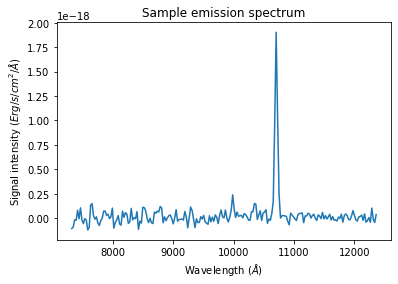

In [ ]:
plt.plot(wavelength, signal)
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("Signal intensity ($Erg/s/cm^2/\AA$)")
plt.title("Sample emission spectrum")
plt.show()

This data actually shows light of a specific color that was emitted from some hot plasma out in space! We call this a **spectral line**. 


We want to learn about the properties of this line, but how? Well, scientists like to fit their data to mathematical **models** (equations) that explain what is happening.

For the case of spectral lines, we typically use what's called a Gaussian model.


##**A bit of math: What is a Gaussian?**

A Gaussian (a.k.a. "bell curve") is one of the most common curves you will see in physics. The Gaussian looks like a single smooth peak, and shows up in statistical physics quite a bit. For example, emission lines in stars and other plasmas generally take this shape. A Gaussian curve looks like this:

![](https://drive.google.com/uc?export=view&id=1DO9ehzwfXJOC6dtjdT-_PtMi_PUwJkRV)

The function is:

## $f(x)=a\cdot e^\frac{-(x-\mu)^2}{2\sigma^2}$

The center of the curve is at position $\mu$, and the curve has width 2$\sigma$ and maximum height $a$. 

Note that here $e$ is Euler's number ($e\sim 2.7$.) The python function for $e$ raised to some power is `np.exp(some_power)`.

&nbsp;

### Question 1: Let's use our skills from last time for defining our own functions and make a `gaussian` function with inputs `x`, `mu`, `sigma`, and `a` that has the form of the function above:

In [ ]:
def gaussian(x,mu,sigma,a):
  answer = # define your gaussian here (hint: this was part of the Day 2 exercises)
  return answer

# Be careful with your parentheses!

###Question 2: Use np.linspace to make an array of 50 datapoints from 0 to 100 called `xvals`. Then feed this array into your gaussian function in place of the `x` input. Pick whatever single values you want for `a`, `mu`, and `sigma`.

In [ ]:
#solution here

xvals = 

yvals = gaussian(    )

###Question 3: Plot this bad boy using plt.plot(). Include whatever axis labels and title you feel like adding.

In [ ]:
#solution here

Take a second to look at the width, height, and mean value of your plot and compare it to your inputs.


&nbsp; 
&nbsp; 
-------
#PAUSE HERE AND TAKE A BREAK!
-------

&nbsp;

## **Fitting a function to data**

Let's now learn about fitting a function to data! 

In research, you typically have some **data** you've collected, and then a **model** (a.k.a. some mathematical function) that you think the data should follow. There is always noise in the data because no instrument is perfect, so the model won't perfectly predict the data. As scientists, we often use a technique called [**least-squares**](https://mathworld.wolfram.com/LeastSquaresFitting.html) to minimize the difference between the plot of the model and the real data points. This will make more sense once you see it visually.

&nbsp;


Let's start with the simplest example of fitting a curve to some data. We can define a function for a line just as we did last time:

In [ ]:
def line(x, m, b):
  y = m*x +b
  return y

&nbsp;

Let's come up with some random noisy data that we could fit a line to. I'm going to use the [np.random](https://numpy.org/doc/1.16/reference/routines.random.html) subpackage to add some noise of a certain scale to the data in order to make it not be a perfect line. I'm going to arbitrarily choose that the true line (without noise) will have a slope of 2 and an intercept of 5.

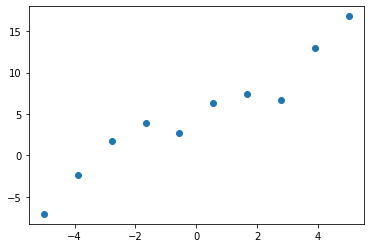

In [ ]:
xvals = np.linspace(-5,5,10)

#generate random noise
rng = np.random.RandomState(108) #seed random generator so it's reproducible
noise = rng.normal(0,2,10) #extra signal generally between -2 and 2

#generate pure data
y_pure = 2*xvals + 5

#add noise to pure data
ynoise = y_pure + noise 

plt.plot(xvals, ynoise,"o") 
plt.show()

We can see how adding the noise impacted the data, since it definitely doesn't *look* like straight line. In real experiments you will always have noise, so your model will never perfectly fit the data. Sometimes a bad fit comes from noise, but sometimes it also comes from discovering something interesting!

&nbsp;

Pretending that we don't already know what the inputs of this data are, let's try fitting a straight line to it. We will now go through to do this with opt.curve_fit. First we import the **`optimize`** subpackage from scipy. Let's import it as "opt." 

In [ ]:
#Import the optimize subpackage
from scipy import optimize as opt


Optimize is a subpackage of scipy with lots of nice functions for minimizing and maximizing mathematical functions. We will be using the [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function, which tries to find what values of the model's inputs that will minimize the difference between the function and your data.

&nbsp;

Here is how we call the **opt.curve_fit** function:

    bfpars, covar = opt.curve_fit(function, xdata, ydata, p0=initial_guess)

&nbsp;

This function returns the **best fit parameters** (`bfpars`) for your function variables, as well as something called the "covariance matrix" (`covar`, which we don't need to worry about for now). 

&nbsp;

The last input, **`p0`, is the initial guess** of the function's variables - this is important because a bad first guess (or lack of a first guess) of the function inputs will cause a bad fit. If you are trying to fit multiple variables in your function, you will need to provide one guess for each variable, fed to the optimizer as a list. 





*NOTE: The order of the guesses in p0 has to be the same as the order of the inputs in the function!*

In [ ]:
bfpars, covar =  opt.curve_fit(line, xvals, ynoise, p0=[1, 3]) #guessing m=1, b=3

print(bfpars)

[1.96615035 4.9124747 ]


`bfpars` is now an array containing the best fit parameters, in the same order as your function. So in my case, `bfpars[0]` is `m` and `bfpars[1]` is `b`.

This is telling us that the closest fit of a line to the data gives m=1.97 and b=4.91. This is reasonably close to the true values of m=2, b=5! 



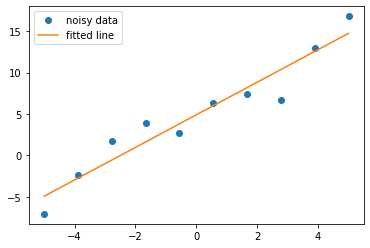

In [ ]:
yfit = xvals*bfpars[0] + bfpars[1]

plt.plot(xvals, ynoise,"o", label="noisy data") #the blue dots
plt.plot(xvals, yfit, label="fitted line") #orange line
plt.legend()
plt.show()

&nbsp;

Let's now try fitting our Gaussian function to the spectral data we loaded in.

###Question 4: Apply the curve_fit function to the function "gaussian" with the data "wavelength" and "signal," and the initial guesses mu=1e4, sigma=100, a=2e-10. Print the bfpars that come out. Try changing the initial guess and see what happens to the output.

In [ ]:
bfpars, covar =  opt.curve_fit(, , , p0=[ , ]) #edit this

#print the results


### Question 5: Now use your `gaussian` function and your best fit parameters to plot the fitted curve with the original data! We'll break this into chunks.
#### a) First generate the points for your fitted curve: You can use the `wavelength` array for your x values. To get the y values, feed the `wavelength` array, along with your `bfpars`, into the `gaussian` function you made.

#### b) Now use the `plt.plot` function to plot the data points as you did in question 3. Make sure to include a `label` in the plot statement, as well as a color and marker shape (see end of Day 1).

#### c) Finally, plot your newly generated points for your fit. You can plot `wavelength` in x and your points from part a in y. Give this curve a good label name and choose a marker/color.

#### Add axes labels and a title, and finish off with `plt.show`!

In [ ]:
#answer here pls

## **Plotting 2D data**

Because plotting is soooo important for reviewing and understanding data, we're going to end the course with an exercise in plotting 2D data. This is important because data can often come in the form of an image. Let's start by loading an image into Colab. Click the file folder icon on the left sidebar and upload the image "m51.jpeg" from the Intro to Python directory. This is a black and white image of the [M51 object](https://en.wikipedia.org/wiki/Whirlpool_Galaxy) from the Hubble Space Telescope. 

To read the image into a python array, we need to use a package called [OpenCV](https://docs.opencv.org/master/d3/df2/tutorial_py_basic_ops.html) (also called `cv2`). Let's import that now:



In [ ]:
import cv2

We will start by reading the image into a numpy array using the command `cv2.imread` and then storing it as a variable:

In [ ]:
# Load image in grayscale
img = cv2.imread('m51.jpeg',0) #the zero tells it to load in grayscale
type(img)

numpy.ndarray

Notice that the image is just a single array of pixel values, with the position in the matrix corresponding to the pixel position in the image.

&nbsp;

To display the image, we use matplotlib (`plt`) like we usually do, but instead of the familiar `plt.plot()` we now use **`plt.imshow()`** for the 2D array of data. You can use this function for any 2D array to see it as an image.

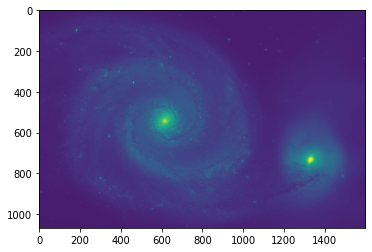

In [ ]:
plt.imshow(img)

Notice that it gives the image a weird green color scale, even though the image is in grayscale. You can modify the color scale of pixel values with the keyword argument **`cmap`** (colormap). There are multiple options you can choose from ([see here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)), but we will stick with grayscale (`gray`) for now:

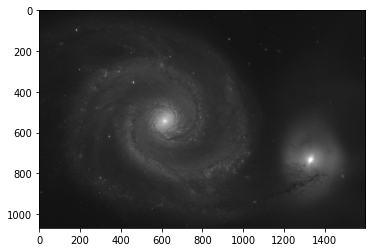

In [ ]:
plt.imshow(img, cmap = 'gray')

Let's also customize the section of the image we are looking at. 

### Question 6: Cropping an image
#### a) Use the `shape` attribute (end of Day1) to figure out the dimensions of the image array. Then slice `img` to the desired range of row and column numbers. You can guestimate the start and end values based on the tick marks on the image above.


In [ ]:
# write your code here


#### b)Play around with the image! Mess with the axes labels [`plt.xlabel()`, `plt.ylabel()`] and the title [`plt.title()`]. You can also display a colorbar with `plt.colorbar()`. If you want to change the [size of the figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html), you can add before all other plot statements:

    plt.figure(figsize=(w,h))

where w and h are the width and height of the image in inches.

In [ ]:
# code goes here

Lastly, let's take a lineout of one part of the image. A **lineout** is when you take a slice of a 2D array that is only a single row or column and plot it as a line. So if I want to take a slice across row 750 of our original M51 image, I could do this:

Text(0.5, 1.0, 'Lineout of M51 galaxy')

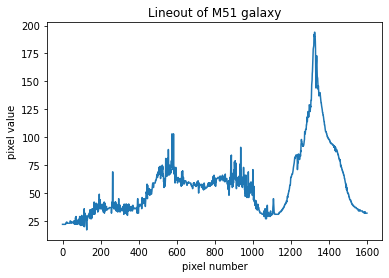

In [ ]:
lineout = img[749,:] #take slice at row 750

plt.plot(lineout)
plt.xlabel("pixel number")
plt.ylabel("pixel value")
plt.title("Lineout of M51 galaxy")

### Question 7: Look back at the original image near the tick mark for row 800. Can you explain why this lineout looks like it does? What are the bumps? What kind of function could you fit to them?

In [ ]:
# write some thoughts in the comments here
#

&nbsp;

Congrats, you've done your first bit of science with Python!


###Don't forget to do your final set of exercises in the Exercises.ipynb file. Work with your classmates and send me the exercises when you're all done :)